In [ ]:
# This is Matt's adaptation of a pyGimli example notebook, with a few extra details/customizations.

# Check out www.pygimli.org for more examples


# VES modelling and inversion for a blocky model

This tutorial shows how a built-in forward operator is used for inversion.
A DC 1D (VES) modelling is used to generate data, simulate noiseand invert them.

We can use this type of example/tutorial to consider the limits of the VES concept
in various geological contexts.

We first import numpy, matplotlib and the 1D plotting function



In [2]:
import numpy as np
import pygimli as pg
from pygimli.physics import VESManager

First, some definitions, starting with 'ab/2' which defines the input (current) electrode spacings,
and 'mn/2' as the receiving (voltage) electrodes.

Default example is a log distribution of 40 electrodes from 10^-0.5 (0.316m) to 10^2.5 (316.2m) with
mn/2 defined as 1/3 the ab/2 separation.

These can easily be adjusted to test different ranges/densities, or replaced with arrays of values
perhaps from a real or planned survey, e.g.
```
ab2 = np.array([1.5, 2.1, 3., 4.2, 6., 9., 13.5, 20., 20., 30., 30., 45., 66.,
                100., 150., 150., 220., 220., 330., 500., 750., 1000. ])
mn2 = np.array([1., 1., 1., 1., 1., 1., 1., 1., 12., 1., 12., 12., 12., 12.,
                12., 90., 12., 90., 90., 90., 90., 90 ])
```

Both the range, and the density of the electrodes can influence the resolution of subsurface layers.


In [19]:
ab2 = np.logspace(-0.5, 2.5, 40)  # AB/2 distance (current electrodes)
mn2 = ab2/3
print(f"ab2 range is {min(ab2):.2f} to {max(ab2):.2f}")

ab2 range is 0.32 to 316.23


Next, define a synthetic model based on n resistivities and n-1 layer thicknesses; concatenated
these define the model for the forward operator.


In [4]:
synres = [100., 500., 30., 800.]  # synthetic resistivity
synthk = [0.5, 3.5, 6.]  # synthetic thickness (nlay-th layer is infinite halfspace)
synthModel = synthk + synres  # concatenate thickness and resistivity

Load the VESManager method, and call the simulate function to simulate the survey data for the model defined above.


In [5]:
ves = VESManager()
rhoa, err = ves.simulate(synthModel, ab2=ab2, mn2=mn2,
                         noiseLevel=0.03, seed=1337)

Next, still using the VESManager, run layered inversion from the simulated survey data.

It is also possible to include a start model for the invert function, in the same format as the synthetic model created above as a list of thicknesses and resistivities, for example:

`startModel=[ 10., 100., 5., 1000., 20., 150., 100. ],`


In [6]:
ves.invert(data=rhoa, relativeError=err, ab2=ab2, mn2=mn2,
           nLayers=len(synres), lam=1000, lambdaFactor=0.8)

17/09/24 - 14:09:35 - pyGIMLi - WARNING - No data error given, set Fallback set to 1%
17/09/24 - 14:09:35 - pyGIMLi - INFO - Created startmodel from forward operator: 7, min/max=0.052705/222.622233
17/09/24 - 14:09:35 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
17/09/24 - 14:09:35 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
17/09/24 - 14:09:35 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
17/09/24 - 14:09:35 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
17/09/24 - 14:09:36 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
17/09/24 - 14:09:36 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
17/09/24 - 14:09:36 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
17/09/24 - 14:09:36 - pyGIMLi - WARNING - Multiprocess Jacobian cur

7 [0.48258999237147543, 3.303908903701217, 8.495898121590585, 96.69006658691228, 508.3951691820138, 41.49206815873418, 835.2425040459594]

show estimated & synthetic models and data with model response in 2 subplots



[(10, 1000), (300, 0.1)]

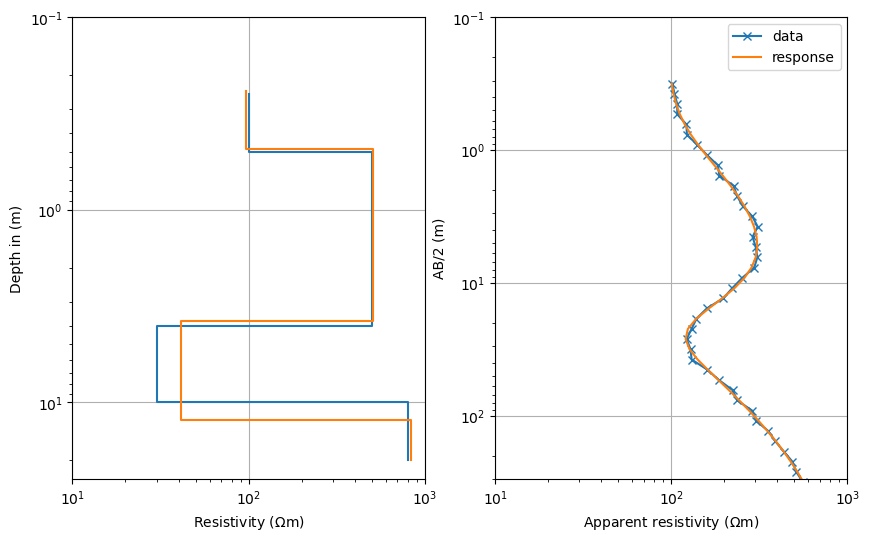

In [23]:
fig, ax = pg.plt.subplots(ncols=2, figsize=(10, 6))  # two-column figure
ves.showModel(synthModel, ax=ax[0], label="synth", plot="semilogy", zmax=20)
ves.showModel(ves.model, ax=ax[0], label="model", zmax=20)
ves.showData(rhoa, ax=ax[1], label="data", color="C0", marker="x")
out = ves.showData(ves.inv.response, ax=ax[1], label="response", color="C1")
ax[0].set(xlim=(10,1000), ylim=(25,0.1)) # x is resistivity, y is depth
ax[1].set(xlim=(10,1000), ylim=(300,0.1))  # x is resistivity, y is ab/2


This general structure can be used to test and understand the strengths and weaknesses of different VES designs with different ground structures. The default settings resolve quite nicely, however other combinations are more challenging, particularly around resolving thin layers, small contrasts and basement characteristics.